In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nw = pd.read_csv('laureate.csv')

In [3]:
nw

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,10-02-1923,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,04-02-1928,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,09-10-1943,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,25-08-1908,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,19-04-1906,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France
5,6,Marie,"Curie, née Sklodowska",1867-11-07,04-07-1934,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",NaN,NaN,NaN
6,6,Marie,"Curie, née Sklodowska",1867-11-07,04-07-1934,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1911,chemistry,NaN,1,"""in recognition of her services to the advance...",Sorbonne University,Paris,France
7,8,Lord Rayleigh,(John William Strutt),1842-11-12,30-06-1919,United Kingdom,GB,"Langford Grove, Maldon, Essex",United Kingdom,GB,NaN,male,1904,physics,NaN,1,"""for his investigations of the densities of th...",Royal Institution of Great Britain,London,United Kingdom
8,9,Philipp Eduard Anton,von Lenard,1862-06-07,20-05-1947,Hungary (now Slovakia),SK,Pressburg (now Bratislava),Germany,DE,Messelhausen,male,1905,physics,NaN,1,"""for his work on cathode rays""",Kiel University,Kiel,Germany
9,10,Joseph John,Thomson,1856-12-18,30-08-1940,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,Cambridge,male,1906,physics,NaN,1,"""in recognition of the great merits of his the...",University of Cambridge,Cambridge,United Kingdom


In [4]:
nw.dropna(how='any',subset=['born',], inplace=True)
nw = nw[nw.born!= '0000/00/00']

In [5]:
import seaborn as sns

In [6]:
golden = (1 + 5 ** 0.5) / 2

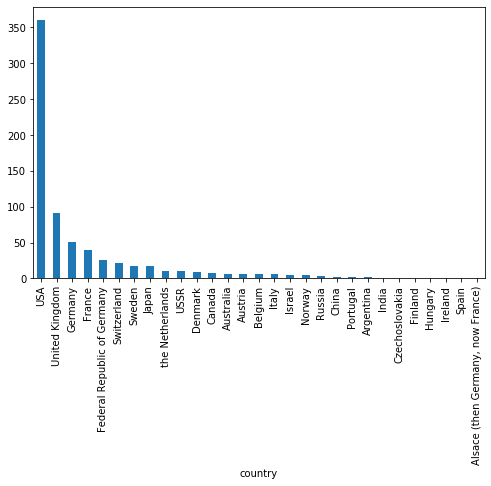

In [7]:
height = 5
nw.groupby('country').size().sort_values(ascending=False).plot(kind='bar', figsize=[height*golden,height]);

In [8]:
import seaborn as sns
golden = (1 + 5 ** 0.5) / 2

In [9]:
display(nw['gender'].value_counts())

male      889
female     50
Name: gender, dtype: int64

In [10]:
nw['bornCountry'].value_counts().head(100)

USA                                             274
United Kingdom                                   88
Germany                                          70
France                                           53
Sweden                                           30
Japan                                            28
Russia                                           20
the Netherlands                                  19
Canada                                           18
Italy                                            18
Switzerland                                      17
Austria                                          15
Norway                                           13
China                                            12
Denmark                                          11
Australia                                        11
Germany (now Poland)                             10
South Africa                                      9
Belgium                                           9
Scotland    

In [11]:
nw['usa_born_winner'] = nw['bornCountry']=="USA"
nw['decade'] = np.int64(np.floor(nw['year']/10 )*10)
prop_usa_winners = nw.groupby(by='decade', as_index=False)['usa_born_winner'].mean()

# USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.078947
2,1920,0.074074
3,1930,0.245902
4,1940,0.309524
5,1950,0.282051
6,1960,0.276316
7,1970,0.311321
8,1980,0.322917
9,1990,0.403846


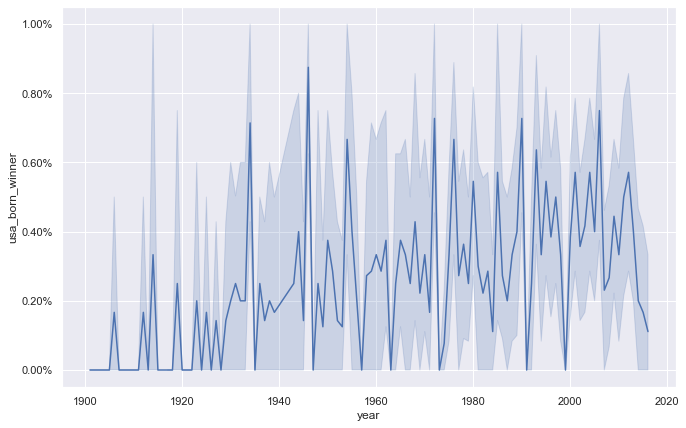

In [12]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

#  USA born winners 
ax = sns.lineplot(x='year', y= 'usa_born_winner', data= nw)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

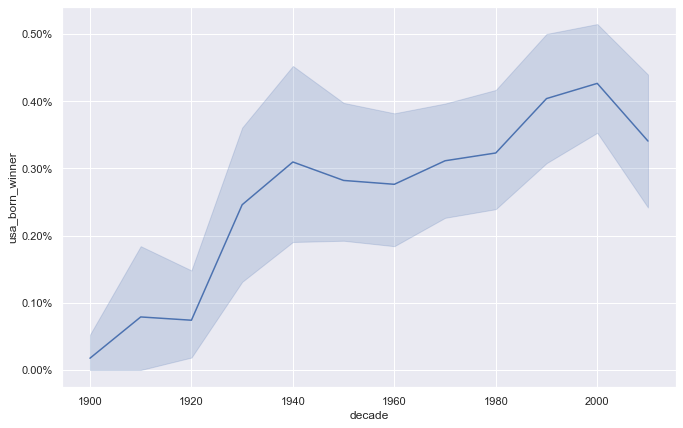

In [13]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

#  USA born winners 
ax = sns.lineplot(x='decade', y= 'usa_born_winner', data= nw)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

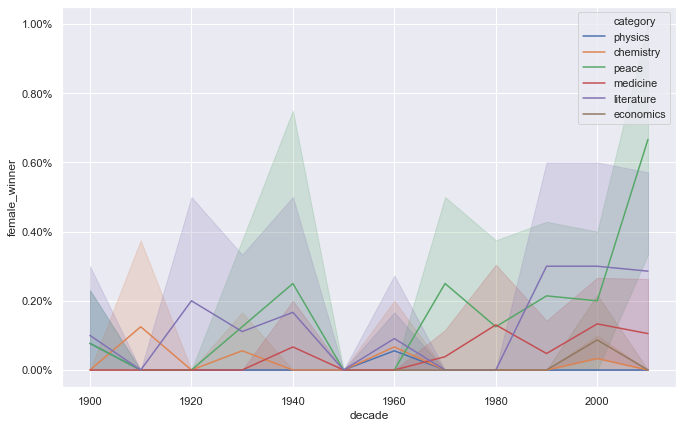

In [14]:

# Calculating the proportion of female laureates per decade
nw['female_winner'] = nw['gender']=='female'
prop_female_winners = nw.groupby(by=['decade','category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y= 'female_winner', data= nw, hue='category')
ax.yaxis.set_major_formatter(PercentFormatter())

In [15]:
# Picking out the first woman to win a Nobel Prize
nw[nw['gender']=='female'].nsmallest(1, columns='year')

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,category,overallMotivation,share,motivation,name,city,country,usa_born_winner,decade,female_winner
5,6,Marie,"Curie, née Sklodowska",1867-11-07,04-07-1934,Russian Empire (now Poland),PL,Warsaw,France,FR,...,physics,NaN,4,"""in recognition of the extraordinary services ...",NaN,NaN,NaN,False,1900,True


In [16]:
# Converting birth_date from String to datetime
nw['birth_date'] = pd.to_datetime(nw['born'],errors='ignore')
print(nw['born'])
# Calculating the age of Nobel Prize winners
nw['age'] = nw['year']-nw['born'].dt.year
# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'})

0      1845-03-27
1      1853-07-18
2      1865-05-25
3      1852-12-15
4      1859-05-15
5      1867-11-07
6      1867-11-07
7      1842-11-12
8      1862-06-07
9      1856-12-18
10     1852-12-19
11     1845-08-16
12     1874-04-25
13     1850-06-06
14     1837-11-23
15     1864-01-13
16     1869-11-30
17     1853-09-21
18     1879-10-09
19     1862-07-02
20     1890-03-31
21     1877-06-07
22     1858-04-23
23     1874-04-15
24     1861-02-15
25     1879-03-14
26     1885-10-07
27     1868-03-22
28     1886-12-03
29     1882-08-26
          ...    
909    22-05-1954
910    13-01-1960
911    23-12-1962
912    23-12-1962
913    24-06-1953
914    30-07-1945
915    11-01-1954
916    12-07-1997
917    09-08-1953
918    28-06-1930
919    12-07-1935
920    30-12-1930
921    09-03-1959
922    29-08-1943
923    28-01-1938
924    28-01-1938
925    13-06-1946
926    13-06-1946
927    08-09-1946
928    31-05-1948
929    19-10-1945
930    21-09-1934
931    14-09-1951
932    22-06-1942
933    21-

AttributeError: Can only use .dt accessor with datetimelike values

In [21]:
display(len(nw))
# Display the number of prizes won by male and female recipients.
display(nw['gender'].value_counts())
# Display the number of prizes won by the top 10 nationalities.
nw['bornCountry'].value_counts()

939

male      889
female     50
Name: gender, dtype: int64

USA                                               274
United Kingdom                                     88
Germany                                            70
France                                             53
Sweden                                             30
Japan                                              28
Russia                                             20
the Netherlands                                    19
Canada                                             18
Italy                                              18
Switzerland                                        17
Austria                                            15
Norway                                             13
China                                              12
Denmark                                            11
Australia                                          11
Germany (now Poland)                               10
South Africa                                        9
Belgium                     

In [20]:
nw['bornCountry'].value_counts().head(10)

USA                274
United Kingdom      88
Germany             70
France              53
Sweden              30
Japan               28
Russia              20
the Netherlands     19
Canada              18
Italy               18
Name: bornCountry, dtype: int64

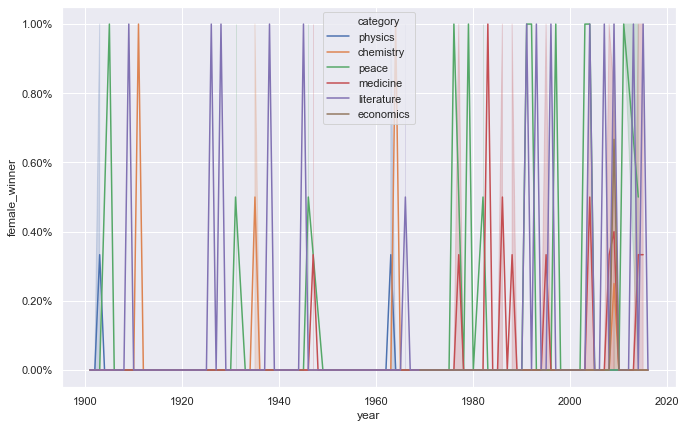

In [19]:
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='year', y= 'female_winner', data= nw, hue='category')
ax.yaxis.set_major_formatter(PercentFormatter())

KeyError: 'female_winner'

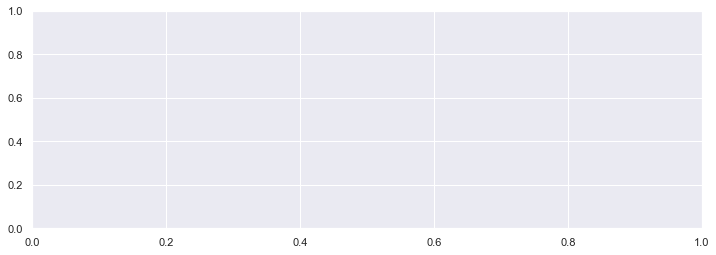

In [18]:
nw['female_winner'] = nw['gender']=='female'
fig,ax=plt.subplots()
nw.groupby('category').plot.scatter(x='decade',y='female_winner', figsize=[12,4],ax=ax);
ax.yaxis.set_major_formatter(PercentFormatter())

In [17]:
nw['Indian_winner'] = nw['bornCountry']=="India"

In [22]:
nw['Indian_winner'].value_counts()

False    932
True       7
Name: Indian_winner, dtype: int64

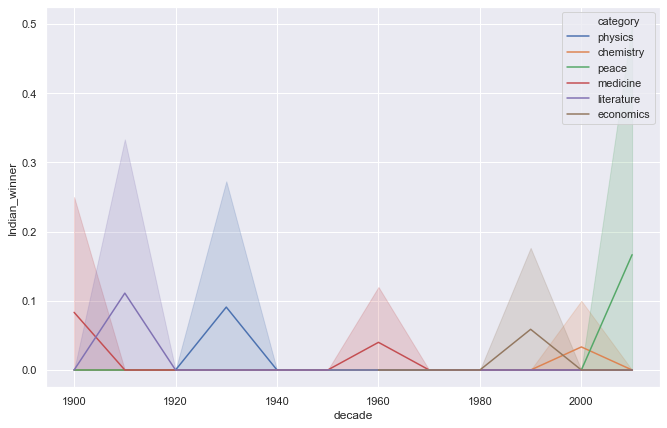

In [23]:
ax = sns.lineplot(x='decade', y= 'Indian_winner', data= nw, hue='category')

In [36]:
nw[nw['Indian_winner']=='True'].head(958)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,share,motivation,name,city,country,usa_born_winner,decade,female_winner,birth_date,Indian_winner
